In [5]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [16]:
data = [('f', 'g', 'k'),('f', 'g', 'h'),('f', 'h', 'k'),('f', 'i', 'j'),('f', 'i', 'l'),('f', 'g', 'k'),('m'),('h', 'i', 'l'),('f', 'g', 'h'),('f', 'g', 'h'),('g', 'h'),('f', 'g', 'k'),('f'),('f', 'j', 'l'),('g'),('h'),('f'),('h', 'k', 'm'),('f', 'g', 'k'),('a', 'f', 'j'),('f', 'g'),('f', 'g'),('f', 'k'),('a', 'f', 'h'),('f', 'g'),('a', 'g'),('f', 'g'),('k', 'l'),('f', 'g'),('g', 'k', 'l'),('f', 'h', 'k'),('g', 'k' ),('g'),('a', 'f', 'h'),('f', 'g', 'h'),('g', 'h', 'k'),('a', 'f'),('g', 'h'),('f', 'g', 'h'),('g'),('f', 'g' ),('g'),('g', 'h', 'm')]

nodes = set()
for t in data:
    for n in t:
        nodes.add(n)
    
G = nx.Graph()
G.add_nodes_from(nodes)

G.add_weighted_edges_from([(i,j,0) for i in nodes for j in nodes if i!=j])

for t in data:
    if len(t) == 3:
        G[t[0]][t[1]]['weight'] += 1
        G[t[1]][t[2]]['weight'] += 1
        G[t[0]][t[2]]['weight'] += 1
    if len(t) == 2:
        G[t[0]][t[1]]['weight'] += 1
    if len(t)>3:
        print t

for (u,v) in G.edges():
    if G.get_edge_data(u,v)['weight']==0:
        G.remove_edges_from([(u,v)])

(-1.5, 1.5, -1.5, 1.5)

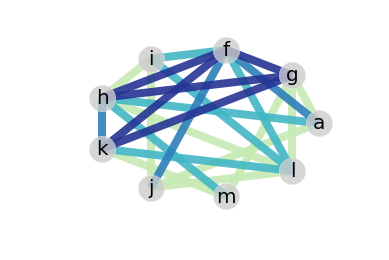

In [20]:

pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=700,node_color='#cccccc',alpha=0.8)
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
#     labels = nx.get_edge_attributes(G,'weight')
#     nx.draw_networkx_edge_labels(G,pos,edge_labels={(k[0],k[1]):round(v,3) for k,v in labels.iteritems()})

cut1 = np.percentile(nx.get_edge_attributes(G,'weight').values(), 20)
cut2 = np.percentile(nx.get_edge_attributes(G,'weight').values(), 40)
cut3 = np.percentile(nx.get_edge_attributes(G,'weight').values(), 60)
cut4 = np.percentile(nx.get_edge_attributes(G,'weight').values(), 80)

esmall = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= cut1]
emedium = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > cut1 and d['weight'] <= cut2]
elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > cut2 and d['weight'] <= cut3]
ehuge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > cut3 and d['weight'] <= cut4]
enormous = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > cut4]

colors = ["#c7e9b4","#7fcdbb","#41b6c4","#2c7fb8","#253494"]
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=8,alpha=0.9,arros=True,edge_color=colors[0])
nx.draw_networkx_edges(G,pos,edgelist=emedium,width=8,alpha=0.9,arros=True,edge_color=colors[1])
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=8,alpha=0.9,arros=True,edge_color=colors[2])
nx.draw_networkx_edges(G,pos,edgelist=ehuge,width=8,alpha=0.9,arros=True,edge_color=colors[3])
nx.draw_networkx_edges(G,pos,edgelist=enormous,width=8,alpha=0.9,arros=True,edge_color=colors[4])
plt.axis('off')

In [15]:
for (u,v) in G.edges():
    print u,v, G.get_edge_data(u,v)

a g {'weight': 1}
a f {'weight': 4}
a h {'weight': 2}
a j {'weight': 1}
g f {'weight': 15}
g h {'weight': 9}
g k {'weight': 7}
g m {'weight': 1}
g l {'weight': 1}
f i {'weight': 2}
f h {'weight': 9}
f k {'weight': 7}
f j {'weight': 3}
f l {'weight': 2}
i h {'weight': 1}
i j {'weight': 1}
i l {'weight': 2}
h k {'weight': 4}
h m {'weight': 2}
h l {'weight': 1}
k m {'weight': 1}
k l {'weight': 2}
j l {'weight': 1}
